# ST2195 Programming for Data Science
## Coursework Project

Candidate number: 200665977 

As we already had some comments about the steps to approach the questions in R markdown file, in this jupyter markdown, I only write the codes to get the outputs which are similar to the R markdown results.

## Import Data and Libraries

In [2]:
#For data wrangling
import pandas as pd
import numpy as np
import os
from statistics import mean
import random
#For plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
#Machine learning
from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer #transform different types
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
from math import sqrt


/Users/bo/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [4]:
pwd = os.getcwd()

In [5]:
data_1999 = pd.read_csv(pwd + "/CourseWork_Data/1999.csv",encoding='latin-1')
data_2000 = pd.read_csv(pwd + "/CourseWork_Data/2000.csv",encoding='latin-1')

In [4]:
airports = pd.read_csv(pwd + "/CourseWork_Data/airports.csv",encoding='latin-1')
carriers = pd.read_csv(pwd + "/CourseWork_Data/carriers.csv",encoding='latin-1')
plane_data = pd.read_csv(pwd + "/CourseWork_Data/plane-data.csv",encoding='latin-1')

In [6]:
dataset = pd.concat([data_1999, data_2000], ignore_index=True, sort=False)
dataset_modified = dataset.copy()
dataset_modified

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1999,1,27,3,1906.0,1908,2024.0,2005,US,1244,...,3,9,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,1999,1,28,4,2016.0,1908,2126.0,2005,US,1244,...,19,10,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,1999,1,29,5,1907.0,1908,2000.0,2005,US,1244,...,2,8,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,1999,1,31,7,1932.0,1908,2031.0,2005,US,1244,...,6,8,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,1999,1,1,5,1601.0,1535,1707.0,1645,US,297,...,11,8,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11210926,2000,12,9,6,615.0,613,941.0,945,AA,705,...,11,18,0,NaN,0,NaN,NaN,NaN,NaN,NaN
11210927,2000,12,10,7,619.0,613,925.0,945,AA,705,...,8,15,0,NaN,0,NaN,NaN,NaN,NaN,NaN
11210928,2000,12,11,1,611.0,613,949.0,945,AA,705,...,8,12,0,NaN,0,NaN,NaN,NaN,NaN,NaN
11210929,2000,12,12,2,613.0,613,1005.0,945,AA,705,...,9,18,0,NaN,0,NaN,NaN,NaN,NaN,NaN


## Data Wrangling

In [6]:
dataset_modified.isna().sum()

Year                        0
Month                       0
DayofMonth                  0
DayOfWeek                   0
DepTime                341801
CRSDepTime                  0
ArrTime                369610
CRSArrTime                  0
UniqueCarrier               0
FlightNum                   0
TailNum                     0
ActualElapsedTime      369610
CRSElapsedTime           9261
AirTime                369610
ArrDelay               369610
DepDelay               341801
Origin                      0
Dest                        0
Distance                    0
TaxiIn                      0
TaxiOut                     0
Cancelled                   0
CancellationCode     11210931
Diverted                    0
CarrierDelay         11210931
WeatherDelay         11210931
NASDelay             11210931
SecurityDelay        11210931
LateAircraftDelay    11210931
dtype: int64

In [7]:
selected_columns = ["Year",
                    "Month",
                    "DayofMonth",
                    "DayOfWeek",
                    "FlightNum",
                    "TailNum",
                    "Origin",
                    "Dest",
                    "CRSDepTime",
                    "CRSArrTime",
                    "DepTime",
                    "ArrTime",
                    "ArrDelay",
                    "DepDelay"]
flightdb = dataset_modified.loc[(dataset_modified.Cancelled == 0) 
                                    & (dataset_modified.Diverted == 0)
                                    & (dataset_modified.ArrDelay > 0),selected_columns]
flightdb


,Year,Month,DayofMonth,DayOfWeek,FlightNum,TailNum,Origin,Dest,CRSDepTime,CRSArrTime,DepTime,ArrTime,ArrDelay,DepDelay
0,1999,1,27,3,1244,N942VJ,RIC,PHL,1908,2005,1906.0,2024.0,19.0,-2.0
1,1999,1,28,4,1244,N955VJ,RIC,PHL,1908,2005,2016.0,2126.0,81.0,68.0
3,1999,1,31,7,1244,N912VJ,RIC,PHL,1908,2005,1932.0,2031.0,26.0,24.0
4,1999,1,1,5,297,N935VJ,ROC,PHL,1535,1645,1601.0,1707.0,22.0,26.0
5,1999,1,2,6,297,N980VJ,ROC,PHL,1535,1645,1651.0,1829.0,104.0,76.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11210918,2000,12,1,5,705,N639AA,BOS,DFW,613,945,629.0,1006.0,21.0,16.0
11210925,2000,12,8,5,705,N641AA,BOS,DFW,613,945,620.0,949.0,4.0,7.0
11210928,2000,12,11,1,705,N638AA,BOS,DFW,613,945,611.0,949.0,4.0,-2.0
11210929,2000,12,12,2,705,N627AA,BOS,DFW,613,945,613.0,1005.0,20.0,0.0


In [8]:
flightdb[selected_columns].isna().sum()

Year          0
Month         0
DayofMonth    0
DayOfWeek     0
FlightNum     0
TailNum       0
Origin        0
Dest          0
CRSDepTime    0
CRSArrTime    0
DepTime       0
ArrTime       0
ArrDelay      0
DepDelay      0
dtype: int64

## Question 1

### The best time of day

In [9]:
def TimeDivide(time):
    if time < 401:
        return "0AM - 4AM"
    elif time < 801:
        return "4AM - 8AM"
    elif time < 1201:
        return "8AM - 12PM"
    elif time < 1601:
        return "12PM - 4PM"
    elif time < 2001:
        return "4PM - 8PM"
    elif time < 2401:
        return "8PM - 12AM"
    else:
        return "0AM - 4AM"
TimeInterval = []
for i in flightdb.CRSDepTime:
    TimeInterval.append(TimeDivide(i))
flightdb["Time_Interval"] = TimeInterval
flightdb


,Year,Month,DayofMonth,DayOfWeek,FlightNum,TailNum,Origin,Dest,CRSDepTime,CRSArrTime,DepTime,ArrTime,ArrDelay,DepDelay,Time_Interval
0,1999,1,27,3,1244,N942VJ,RIC,PHL,1908,2005,1906.0,2024.0,19.0,-2.0,4PM - 8PM
1,1999,1,28,4,1244,N955VJ,RIC,PHL,1908,2005,2016.0,2126.0,81.0,68.0,4PM - 8PM
3,1999,1,31,7,1244,N912VJ,RIC,PHL,1908,2005,1932.0,2031.0,26.0,24.0,4PM - 8PM
4,1999,1,1,5,297,N935VJ,ROC,PHL,1535,1645,1601.0,1707.0,22.0,26.0,12PM - 4PM
5,1999,1,2,6,297,N980VJ,ROC,PHL,1535,1645,1651.0,1829.0,104.0,76.0,12PM - 4PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11210918,2000,12,1,5,705,N639AA,BOS,DFW,613,945,629.0,1006.0,21.0,16.0,4AM - 8AM
11210925,2000,12,8,5,705,N641AA,BOS,DFW,613,945,620.0,949.0,4.0,7.0,4AM - 8AM
11210928,2000,12,11,1,705,N638AA,BOS,DFW,613,945,611.0,949.0,4.0,-2.0,4AM - 8AM
11210929,2000,12,12,2,705,N627AA,BOS,DFW,613,945,613.0,1005.0,20.0,0.0,4AM - 8AM


In [10]:
TimeOfDay = flightdb.groupby("Time_Interval").ArrDelay.agg(['mean', 'sum']).reset_index()
TimeOfDay.rename(columns = {'mean':'Avg_delay', 'sum':'Total_delay'}, inplace = True)
TimeOfDay.sort_values("Avg_delay")

,Time_Interval,Avg_delay,Total_delay
2,4AM - 8AM,18.102210,11257674.0
4,8AM - 12PM,22.161595,27241011.0
0,0AM - 4AM,27.370159,3476366.0
1,12PM - 4PM,27.657947,37641691.0
5,8PM - 12AM,32.324973,19924305.0
3,4PM - 8PM,34.188732,48300336.0


<AxesSubplot:title={'center':'The average delay per time frames'}, xlabel='Time_Interval'>

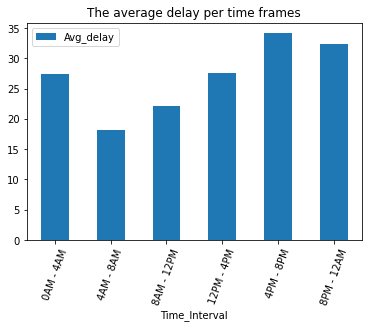

In [11]:
df_mapping = pd.DataFrame({
    'timeinterval': ['0AM - 4AM', '4AM - 8AM', '8AM - 12PM', '12PM - 4PM', '4PM - 8PM',"8PM - 12AM"],
})
sort_mapping = df_mapping.reset_index().set_index('timeinterval')
TimeOfDay['timeinterval_index'] = TimeOfDay['Time_Interval'].map(sort_mapping['index'])
TimeOfDay.sort_values('timeinterval_index').plot.bar(x = "Time_Interval", y = "Avg_delay", rot=70, title="The average delay per time frames")

### The best day of week

In [12]:
DayWeek = flightdb.groupby("DayOfWeek").agg({'ArrDelay':'mean'}).reset_index()
DayWeek.rename(columns = {'ArrDelay':'Avg_delay'}, inplace = True)
DayWeek.sort_values("Avg_delay")

,DayOfWeek,Avg_delay
1,2,24.825967
5,6,25.989915
2,3,26.345413
0,1,26.654220
6,7,28.431899
3,4,28.629192
4,5,30.884425


<AxesSubplot:title={'center':'The average delay per day of week'}, xlabel='day_week'>

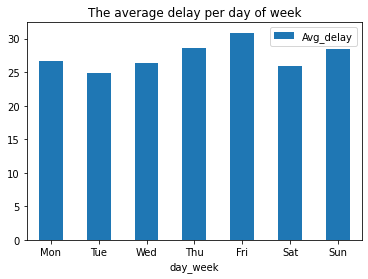

In [13]:
name_day_of_week = pd.DataFrame({
    'day_week': ['Mon', 'Tue', 'Wed', 'Thu', 'Fri',"Sat", "Sun"],
    'num': [1, 2, 3, 4, 5, 6, 7]
})
DayWeek_plot = DayWeek.join(name_day_of_week)
DayWeek_plot.plot.bar(x = "day_week", y = "Avg_delay", rot=0, title="The average delay per day of week")

### The best time of year

In [14]:
TimeOfYear = flightdb.groupby("Month").agg({'ArrDelay':'mean'}).reset_index()
TimeOfYear.rename(columns = {'ArrDelay':'Avg_delay'}, inplace = True)
TimeOfYear.sort_values("Avg_delay")

,Month,Avg_delay
9,10,23.626813
8,9,24.011412
10,11,24.343317
1,2,24.817798
2,3,25.150175
3,4,26.233410
7,8,28.375577
11,12,28.606778
4,5,29.204385
0,1,29.231795


<AxesSubplot:title={'center':'The average delay per months'}, xlabel='month'>

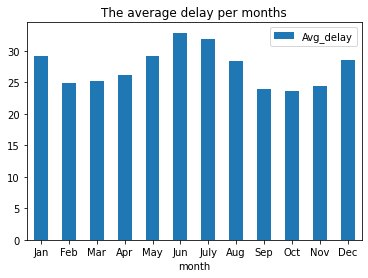

In [15]:
name_day_of_month = pd.DataFrame({
    'month': ['Jan', 'Feb', 'Mar', 'Apr', 'May',"Jun", "July","Aug","Sep","Oct","Nov","Dec"],
    'num': [1, 2, 3, 4, 5, 6, 7,8,9,10,11,12]
})
TimeOfYear_plot = TimeOfYear.join(name_day_of_month)
TimeOfYear_plot.plot.bar(x = "month", y = "Avg_delay", rot=0, title="The average delay per months")

## Question 2

In [16]:
plane_data_modified = plane_data.dropna()[plane_data.year < "2001"]
plane_data_modified


/var/folders/hh/1gnlnf013m3b1z0ggw9jmxhw0000gn/T/ipykernel_73306/2981175436.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plane_data_modified = plane_data.dropna()[plane_data.year < "2001"]


,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
35,N102UW,Corporation,AIRBUS INDUSTRIE,05/26/1999,A320-214,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998
36,N10323,Corporation,BOEING,07/01/1997,737-3TO,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1986
37,N103US,Corporation,AIRBUS INDUSTRIE,06/18/1999,A320-214,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1999
38,N104UA,Corporation,BOEING,01/26/1998,747-422,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998
39,N104UW,Corporation,AIRBUS INDUSTRIE,07/02/1999,A320-214,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1999
...,...,...,...,...,...,...,...,...,...
5022,N996DL,Corporation,MCDONNELL DOUGLAS AIRCRAFT CO,02/27/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1991
5024,N997DL,Corporation,MCDONNELL DOUGLAS AIRCRAFT CO,03/11/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1992
5026,N998DL,Corporation,MCDONNELL DOUGLAS CORPORATION,04/02/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1992
5027,N999CA,Foreign Corporation,CANADAIR,07/09/2008,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1998


In [17]:
q2 = pd.merge(flightdb, plane_data_modified, how = 'inner',left_on='TailNum',right_on='tailnum')
q2_modified = q2.groupby('year')['ArrDelay'].agg(['mean','count']).reset_index()
q2_modified.rename(columns = {'mean':'avg_delay','count': 'num_of_delay'}, inplace = True)
q2_modified.sort_values('avg_delay', ascending= False).head(10)

,year,avg_delay,num_of_delay
0,1956,40.949239,197
11,1972,33.732984,191
4,1964,32.092308,1170
20,1982,30.568230,2367
1,1959,30.537427,2231
2,1962,29.792779,1274
27,1989,29.484844,169409
13,1974,29.410000,1400
3,1963,28.767626,1390
28,1990,28.668646,198899


<AxesSubplot:xlabel='year', ylabel='num_of_delay'>

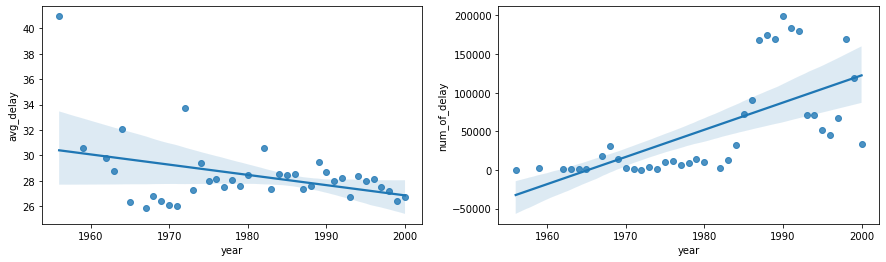

In [18]:
q2_modified.year = pd.to_numeric(q2_modified.year)
fig, ax = plt.subplots(ncols = 2, figsize =(15,4))
sns.regplot(x = 'year', y ='avg_delay', data = q2_modified, ax = ax[0])
sns.regplot(x = 'year', y ='num_of_delay', data = q2_modified, ax = ax[1])

## Question 3

In [35]:
q3 = pd.merge(dataset_modified, airports, how = 'inner', left_on = 'Dest', right_on = 'iata')

In [36]:
q3_modified = q3[q3.Cancelled == 0].groupby(['state','Year'])['CRSDepTime'].count().reset_index()
q3_modified.rename(columns = {'CRSDepTime': 'num_of_flights'}, inplace = True)
q3_modified.sort_values('num_of_flights', ascending= False).head(10)

,state,Year,num_of_flights
9,CA,2000,678908
8,CA,1999,640212
84,TX,1999,602848
85,TX,2000,598840
15,FL,2000,356034
14,FL,1999,341644
24,IL,1999,333644
25,IL,2000,330650
16,GA,1999,262291
17,GA,2000,261270


In [37]:
flight_state = q3_modified.pivot_table(values='num_of_flights', index=['state'], columns=['Year'])
flight_state.rename(columns = {1999: 'flight1999',2000: 'flight2000'}, inplace = True)
flight_state['gap'] = flight_state['flight2000'] - flight_state['flight1999']
flight_state.sort_values('flight1999', ascending=False).reset_index().head(6)

Year,state,flight1999,flight2000,gap
0,CA,640212,678908,38696
1,TX,602848,598840,-4008
2,FL,341644,356034,14390
3,IL,333644,330650,-2994
4,GA,262291,261270,-1021
5,MO,233440,228775,-4665


In [38]:
moreflightstates = flight_state[flight_state.gap > 0]
moreflightstates.sort_values('gap', ascending = False).head(10)

Year,flight1999,flight2000,gap
state,,,
CA,640212,678908,38696
FL,341644,356034,14390
NC,168054,180812,12758
NV,153139,165845,12706
HI,15328,27661,12333
PA,222793,233758,10965
MD,79944,89349,9405
AZ,193792,202942,9150
NY,206910,214083,7173


In [39]:
lessflightstates = flight_state[(flight_state.gap < 0) | (flight_state.gap == 0)]
lessflightstates.gap = abs(lessflightstates.gap)
lessflightstates.sort_values('gap', ascending = False).head(10)

/var/folders/hh/1gnlnf013m3b1z0ggw9jmxhw0000gn/T/ipykernel_86235/2975732903.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lessflightstates.gap = abs(lessflightstates.gap)


Year,flight1999,flight2000,gap
state,,,
MO,233440,228775,4665
KY,101608,96971,4637
OH,105466,101456,4010
TX,602848,598840,4008
IL,333644,330650,2994
VA,179777,177576,2201
MI,167642,165584,2058
UT,80732,78913,1819
NJ,119936,118160,1776


### Visualization

In [41]:
fig = go.Figure(data=go.Choropleth(
    locations=flight_state.reset_index()['state'], # Spatial coordinates
    z = flight_state['flight1999'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Number of flights",
))

fig.update_layout(
    title_text = 'Number of flights flew in 1999',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [25]:
fig = go.Figure(data=go.Choropleth(
    locations=flight_state.reset_index()['state'], # Spatial coordinates
    z = flight_state['flight2000'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'blues',
    colorbar_title = "Number of flights",
))

fig.update_layout(
    title_text = 'Number of flights flew in 2000',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [26]:
fig = go.Figure(data=go.Choropleth(
    locations= moreflightstates.reset_index()['state'], # Spatial coordinates
    z = moreflightstates['gap'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'greens',
    colorbar_title = "Number of flights",
))

fig.update_layout(
    title_text = 'States with more flights between 1999 and 2000',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [27]:
fig = go.Figure(data=go.Choropleth(
    locations= lessflightstates.reset_index()['state'], # Spatial coordinates
    z = lessflightstates['gap'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'purples',
    colorbar_title = "Number of flights",
))

fig.update_layout(
    title_text = 'States with less flights between 1999 and 2000',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

## Question 4

In [28]:
dataset_modified[dataset_modified.Cancelled == 0].groupby('TailNum').agg({'DepTime':'count'}).rename(columns = {'DepTime':'Number_of_flights'}).sort_values('Number_of_flights',ascending = False).head(6)

,Number_of_flights
TailNum,
N513,6665
N103,6514
N512,6505
N514,6485
N93,6482
N525,6460


In [29]:
dataset_modified[(dataset_modified.TailNum == 'N513')&(dataset_modified.Cancelled == 0)&(dataset_modified.Diverted == 0)][list(['Year','Month','DayofMonth','CRSDepTime','CRSArrTime','DepDelay','ArrDelay'])].sort_values(['Year','Month','DayofMonth','CRSDepTime']).head(20)

,Year,Month,DayofMonth,CRSDepTime,CRSArrTime,DepDelay,ArrDelay
173297,1999,1,1,1020,1120,0.0,-13.0
288845,1999,1,1,1140,1245,7.0,5.0
172794,1999,1,1,1600,1700,0.0,-2.0
108202,1999,1,1,1725,1950,0.0,-5.0
312813,1999,1,1,2010,2055,0.0,-8.0
277558,1999,1,2,630,735,0.0,5.0
398608,1999,1,2,800,1025,0.0,3.0
47338,1999,1,2,1100,1240,0.0,7.0
15732,1999,1,2,1510,1645,0.0,-7.0
324304,1999,1,2,1550,1550,70.0,66.0


In [30]:
airport_flightnum = dataset_modified.loc[(dataset_modified.DepDelay > 0)&(dataset_modified.ArrDelay > 0)].groupby('Origin').agg({'DepTime':'count'}).rename(columns = {'DepTime':'Number_of_flights'})
airport_flightnum.head()

,Number_of_flights
Origin,
ABE,2745
ABQ,22402
ADQ,528
AGS,492
AKN,240


In [31]:
airportaffected= dataset_modified.loc[(dataset_modified.DepDelay > 0)&(dataset_modified.ArrDelay > 0)].groupby('Origin')['Dest'].nunique()
airportaffected = airportaffected.to_frame().rename(columns = {'Dest':'Number_of_airports'})
airportaffected

,Number_of_airports
Origin,
ABE,7
ABQ,28
ADQ,1
AGS,2
AKN,2
...,...
TVC,2
TYS,9
VPS,1


In [32]:
airportaffected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 208 entries, ABE to YAK
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Number_of_airports  208 non-null    int64
dtypes: int64(1)
memory usage: 3.2+ KB


In [33]:
pd.merge(airportaffected, airport_flightnum, left_index= True, right_index= True).sort_values('Number_of_airports', ascending = False).head(10)

,Number_of_airports,Number_of_flights
Origin,,
ORD,98,219545
ATL,97,208672
MSP,93,81278
DFW,91,163660
IAH,84,80671
DTW,84,102021
STL,80,106205
CLT,70,86363
PIT,68,73163


### Data for graphing network

In [34]:
toproutes = dataset_modified.loc[(dataset_modified.DepDelay > 0)&(dataset_modified.ArrDelay > 0)].groupby(['Origin','Dest']).agg({'DepTime':'count'}).rename(columns = {'DepTime':'Number_of_flights'})
toproutes = toproutes[toproutes.Number_of_flights > mean(toproutes.Number_of_flights)].reset_index()
toproutes

,Origin,Dest,Number_of_flights
0,ABQ,DAL,1513
1,ABQ,DEN,1627
2,ABQ,ELP,1359
3,ABQ,LAS,1627
4,ABQ,LAX,1482
...,...,...,...
1082,TUS,DFW,1102
1083,TUS,LAS,1092
1084,TUS,LAX,3089
1085,TUS,PHX,2629


In [35]:
position = airports.loc[:,['iata','long','lat']]
position

,iata,long,lat
0,00M,-89.234505,31.953765
1,00R,-95.017928,30.685861
2,00V,-104.569893,38.945749
3,01G,-78.052081,42.741347
4,01J,-81.905944,30.688012
...,...,...,...
3371,ZEF,-80.786069,36.280024
3372,ZER,-76.373147,40.706449
3373,ZPH,-82.155916,28.228065
3374,ZUN,-108.791777,35.083227


In [36]:
toproutesfinal = pd.merge(toproutes, position, how = 'left', left_on='Origin',right_on='iata').rename(columns = {'long':'start_long', 'lat':'start_lat'})
toproutesfinal = pd.merge(toproutesfinal, position, how = 'left', left_on='Dest',right_on='iata').rename(columns = {'long':'end_long', 'lat':'end_lat'})
toproutesfinal.head()



,Origin,Dest,Number_of_flights,iata_x,start_long,start_lat,iata_y,end_long,end_lat
0,ABQ,DAL,1513,ABQ,-106.609194,35.040222,DAL,-96.851772,32.847114
1,ABQ,DEN,1627,ABQ,-106.609194,35.040222,DEN,-104.667002,39.858408
2,ABQ,ELP,1359,ABQ,-106.609194,35.040222,ELP,-106.377806,31.806667
3,ABQ,LAS,1627,ABQ,-106.609194,35.040222,LAS,-115.152333,36.080361
4,ABQ,LAX,1482,ABQ,-106.609194,35.040222,LAX,-118.408074,33.942536


In [37]:
uniairports = np.unique(toproutesfinal[['Origin', 'Dest']].values)
uniairports = pd.DataFrame(uniairports)
uniairports

,0
0,ABQ
1,ALB
2,AMA
3,ANC
4,ATL
...,...
116,TLH
117,TPA
118,TUL
119,TUS


In [38]:
airportdata = pd.merge(uniairports, airports, how = 'left', left_on = 0, right_on='iata')
airportdata

,0,iata,airport,city,state,country,lat,long
0,ABQ,ABQ,Albuquerque International,Albuquerque,NM,USA,35.040222,-106.609194
1,ALB,ALB,Albany Cty,Albany,NY,USA,42.748119,-73.802979
2,AMA,AMA,Amarillo International,Amarillo,TX,USA,35.219372,-101.705927
3,ANC,ANC,Ted Stevens Anchorage International,Anchorage,AK,USA,61.174320,-149.996186
4,ATL,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944
...,...,...,...,...,...,...,...,...
116,TLH,TLH,Tallahassee Regional,Tallahassee,FL,USA,30.396528,-84.350333
117,TPA,TPA,Tampa International,Tampa,FL,USA,27.975472,-82.533250
118,TUL,TUL,Tulsa International,Tulsa,OK,USA,36.198372,-95.888242
119,TUS,TUS,Tucson International,Tucson,AZ,USA,32.116083,-110.941028


### Visualization

In [39]:
fig = go.Figure()

fig.add_trace(go.Scattergeo(
    locationmode = 'USA-states',
    lon = airportdata['long'],
    lat = airportdata['lat'],
    hoverinfo = 'text',
    text = airportdata['airport'],
    mode = 'markers',
    marker = dict(
        size = 2,
        color = 'rgb(255, 0, 0)',
        line = dict(
            width = 3,
            color = 'rgba(68, 68, 68, 0)'
        )
    )))

flight_paths = []
for i in range(len(toproutesfinal)):
    fig.add_trace(
        go.Scattergeo(
            locationmode = 'USA-states',
            lon = [toproutesfinal['start_long'][i], toproutesfinal['end_long'][i]],
            lat = [toproutesfinal['start_lat'][i], toproutesfinal['end_lat'][i]],
            mode = 'lines',
            line = dict(width = 1,color = 'red'),
            opacity = float(toproutesfinal['Number_of_flights'][i]) / float(toproutesfinal['Number_of_flights'].max()),
        )
    )

fig.update_layout(
    title_text = 'Airports Network Interaction',
    showlegend = False,
    geo = dict(
        scope = 'north america',
        projection_type = 'azimuthal equal area',
        showland = True,
        landcolor = 'rgb(243, 243, 243)',
        countrycolor = 'rgb(204, 204, 204)',
    ),
)

fig.show()

## Question 5

### Pre-processing data

In [7]:
variables = ['Month', 'DayofMonth','DayOfWeek', 'CRSDepTime','CRSArrTime','UniqueCarrier','Origin','Dest','Distance','ArrDelay']
data_input = dataset_modified.loc[(dataset_modified.Cancelled == 0) & (dataset_modified.Diverted == 0),variables]

In [13]:
numerical_features = ['CRSDepTime','CRSArrTime','Distance']  # family size added as new numerical feature/variable

# Applying StandardScaler into a pipeline
numerical_transformer = Pipeline(steps=[
    #('imputer', SimpleImputer()),
    ('scaler', StandardScaler())])

categorical_features = ['UniqueCarrier','Origin','Dest','Month', 'DayofMonth','DayOfWeek',]

# Applying OneHotEncoder into another pipeline
categorical_transformer = Pipeline(steps=[
    #('imputer', SimpleImputer()),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

data_transformer = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer, numerical_features),
        ('categorical', categorical_transformer, categorical_features)])
#param_grid = {
#    'data_transformer__numerical__imputer__strategy': ['mean', 'median'],
#    'data_transformer__categorical__imputer__strategy': ['constant','most_frequent']
#}

### Modelling

#### Create test and train sets

In [14]:
data_split = data_input.sample(n = round(0.01 * len(data_input)), random_state = 5)
X = data_split[variables[0:9]].copy()
y = data_split[variables[-1]].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=1)

In [15]:
data_split.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108413 entries, 7366810 to 6070127
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Month          108413 non-null  int64  
 1   DayofMonth     108413 non-null  int64  
 2   DayOfWeek      108413 non-null  int64  
 3   CRSDepTime     108413 non-null  int64  
 4   CRSArrTime     108413 non-null  int64  
 5   UniqueCarrier  108413 non-null  object 
 6   Origin         108413 non-null  object 
 7   Dest           108413 non-null  object 
 8   Distance       108413 non-null  int64  
 9   ArrDelay       108413 non-null  float64
dtypes: float64(1), int64(6), object(3)
memory usage: 9.1+ MB


#### Linear Regression

In [16]:
pipe_lm = Pipeline(steps=[('data_transformer', data_transformer),
                          ('pipe_lm', LinearRegression())])

#grid_lm = GridSearchCV(pipe_lm, param_grid=param_grid)
pipe_lm.fit(X_train, y_train);

In [17]:
y_predict_lm = pipe_lm.predict(X_test)
mse_lm = mean_squared_error(y_test, y_predict_lm)
mse_lm

1179.6220165982202

#### Random Forest

In [20]:
pipe_rf = Pipeline(steps=[('data_transformer', data_transformer),
                           ('pipe_rf', RandomForestRegressor(random_state=0))])

#grid_rf = GridSearchCV(pipe_rf, param_grid=param_grid)
#grid_rf.fit(X_train, y_train);
pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('data_transformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['CRSDepTime', 'CRSArrTime',
                                                   'Distance']),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['UniqueCarrier', 'Origin',
                                                   'Dest', 'Month',
                                                   'DayofMonth',
                                                   'DayOfWeek'])])),
                ('pipe_rf', RandomForestRegressor(random_st

In [21]:
y_predict_rf = pipe_rf.predict(X_test)
mse_ranger = mean_squared_error(y_test, y_predict_rf)
mse_ranger

1207.8374004023558

#### Support Vector (Additional)

In [14]:
pipe_svr = Pipeline(steps=[('data_transformer', data_transformer),
                           ('pipe_svr', SVR())])
#grid_svr = GridSearchCV(pipe_svr, param_grid=param_grid)
#grid_svr.fit(X_train, y_train);
pipe_svr.fit(X_train, y_train)

Pipeline(steps=[('data_transformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Month', 'DayofMonth',
                                                   'DayOfWeek', 'CRSDepTime',
                                                   'CRSArrTime', 'Distance']),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['UniqueCarrier', 'Origin',
                                                   'Dest'])])),
                ('pipe_svr', SVR())])

In [26]:
y_predict_svr = pipe_svr.predict(X_test)
mse_svr = mean_squared_error(y_test, y_predict_svr)
mse_svr

1258.1258076796728

#### Rigde Regression

In [18]:
pipe_ridge = Pipeline(steps=[('data_transformer', data_transformer),
                          ('pipe_ridge', Ridge())])
#grid_ridge = GridSearchCV(pipe_ridge, param_grid=param_grid)
pipe_ridge.fit(X_train, y_train);


In [19]:
y_predict_ridge = pipe_ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_predict_ridge)
mse_ridge

1177.4321930996389

#### Compare models

In [22]:
models = {'Random forest': mse_ranger,'Linear Regression': mse_lm, 'Ridge Regression': mse_ridge}
pd.DataFrame.from_dict(models, orient= 'index', columns=['Mse'])

,Mse
Random forest,1207.837400
Linear Regression,1179.622017
Ridge Regression,1177.432193
